In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# precisions_file = '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/no_augmentation/eval/precisions_101213.npy'  
# recalls_file = '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/no_augmentation/eval/recalls_101213.npy' 
folders = ['/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/full_augmentation/eval',
           '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/no_augmentation/eval',
           '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/no_geometric/eval',
           '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/no_im_processing/eval',
           '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/no_localization_noise/eval',
           '/home/golden/Projects_desktop/kenya-tracking/models/IOU_threshold_tests/iou_thresh_0_8/test',
          ]

folders = [
           '/home/golden/Projects_desktop/kenya-tracking/models/augmentation_tests/full_augmentation/eval',
           '/home/golden/Projects_desktop/kenya-tracking/models/hard_neg_mining_tests/iou_thresh_0_8/eval',
            '/home/golden/Projects_desktop/kenya-tracking/models/hard_neg_mining_tests/iou_thresh_0_7/eval'
          ]


           
           

In [3]:
model_names = []
for folder in folders:
    model_names.append(folder.split('/')[-2])
print(model_names)

['full_augmentation', 'iou_thresh_0_8', 'iou_thresh_0_7']


In [4]:
precision_files = []
recall_files = []
training_steps = []

for folder in folders:
    precision_files.append(glob.glob(folder + '/precisions_*'))
    recall_files.append(glob.glob(folder + '/recalls_*'))

In [5]:
for model in range(len(precision_files)):     
    training_steps_precision = (
        [int(os.path.splitext(os.path.basename(file))[0].split('_')[1]) for file in precision_files[model]])
    training_steps_recall = (
        [int(os.path.splitext(os.path.basename(file))[0].split('_')[1]) for file in recall_files[model]])

    #sorted precision files
    precision_files[model] = [file for _,file in sorted(zip(training_steps_precision, precision_files[model]))]
    #sorted recall files
    recall_files[model] = [file for _,file in sorted(zip(training_steps_recall, recall_files[model]))]

    training_steps.append(sorted(training_steps_precision))


In [6]:
demo_file =np.load(precision_files[0][0])
number_of_species = demo_file.shape[0]
print('number of species: ', number_of_species)
print(len(training_steps))

number of species:  4
3


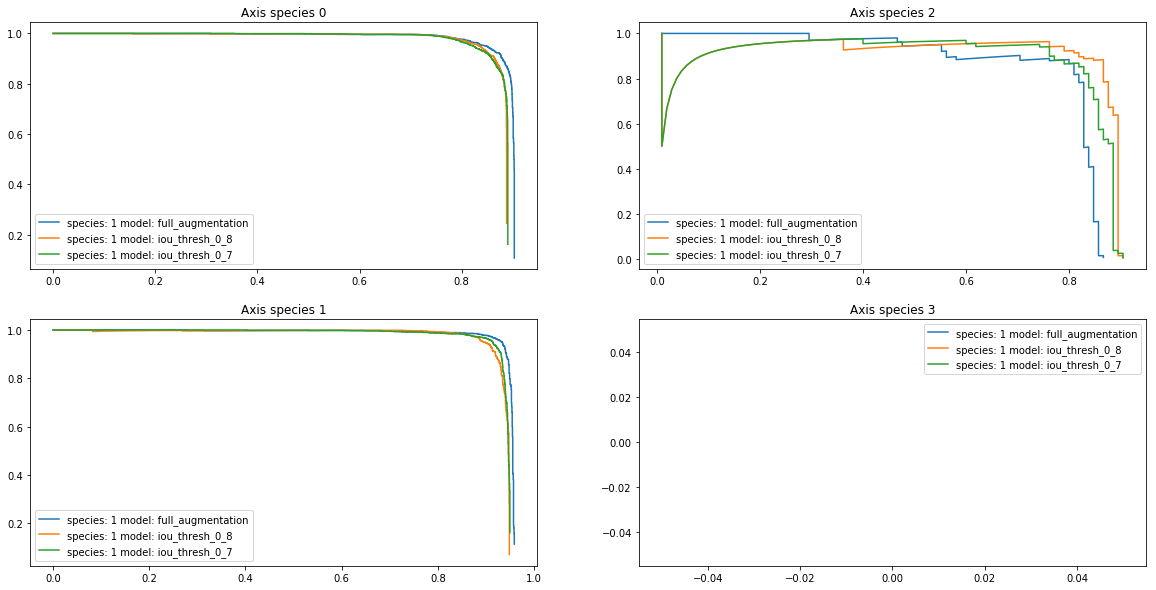

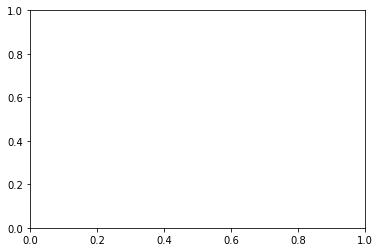

In [7]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2, figsize=(20, 10))
f2, plot = plt.subplots(1, 1)

for model_num in range(len(recall_files)):
    for species in range(number_of_species):
        
          for train_ind in range(len(training_steps[model_num])-1, len(training_steps[model_num])):
#         for train_ind in range(1, 2):
        #     plt.figure()
    #         print(training_steps[step_ind])
            precision = np.load(precision_files[model_num][train_ind]) 
            recall = np.load(recall_files[model_num][train_ind])
            axarr[species % 2, species // 2].plot(recall[species], precision[species], label='species: ' + str(1) + ' model: ' + model_names[model_num])
            axarr[species % 2, species // 2].set_title('Axis species ' + str(species))
            axarr[species % 2, species // 2].legend()
            
            #plot.plot(recall[1], precision[1], label='species: ' + str(1) + ' model: ' + model_names[model_num])
    

#plot.legend()

model:  0 species:  0 length: 27946
model:  0 species:  1 length: 15681
model:  0 species:  2 length: 11898
model:  0 species:  3 length: 31775
model:  1 species:  0 length: 11972
model:  1 species:  1 length: 25107
model:  1 species:  2 length: 10964
model:  1 species:  3 length: 39257
model:  2 species:  0 length: 18215
model:  2 species:  1 length: 10923
model:  2 species:  2 length: 19183
model:  2 species:  3 length: 38979


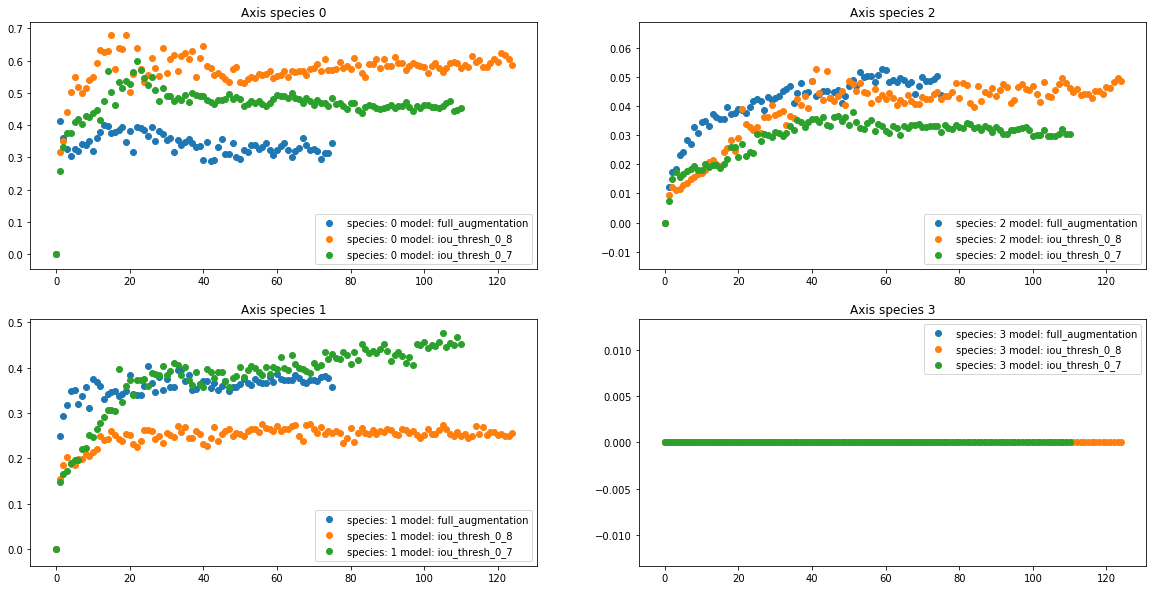

In [10]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2, figsize=(20, 10))

total_precision = [[[] for _ in range(number_of_species)] for _ in range(len(recall_files))]

for model_num in range(len(recall_files)):
    for species in range(number_of_species):
        
#           for train_ind in range(len(training_steps[model_num])-1, len(training_steps[model_num])):
        for train_ind in range(len(training_steps[model_num])):
        #     plt.figure()
    #         print(training_steps[step_ind])
            precision = np.load(precision_files[model_num][train_ind]) 
            recall = np.load(recall_files[model_num][train_ind])
            total_precision[model_num][species].append(np.sum(precision[species]) / precision[species].shape[0])
        print('model: ', model_num, 'species: ', species, 'length:', precision[species].shape[0])
for model_num in range(len(recall_files)):
    for species in range(number_of_species): 
        axarr[species % 2, species // 2].scatter(np.arange(len(total_precision[model_num][species])), 
                                                 total_precision[model_num][species], 
                                                 label='species: ' + str(species) + ' model: ' + model_names[model_num])
        axarr[species % 2, species // 2].set_title('Axis species ' + str(species))
        axarr[species % 2, species // 2].legend()
            
            #plot.plot(recall[1], precision[1], label='species: ' + str(1) + ' model: ' + model_names[model_num])